# <center><font color=maroon>CPE4903 Project: MNIST Handwritten Digit Classification</font> </center>

### In this mini-project, you will develop a CNN model for the handwritten digit classifier. 
* Use the companion notebook file, `CPE_4903_MNIST_NN`, as a reference and follow the steps to train and test the model. 
* <font color=red>Performance requirement: the accuracy on the test data needs to be better than 99% </font>
* You will save the parameters of the model at the end, which will be deployed on Raspberry Pi.

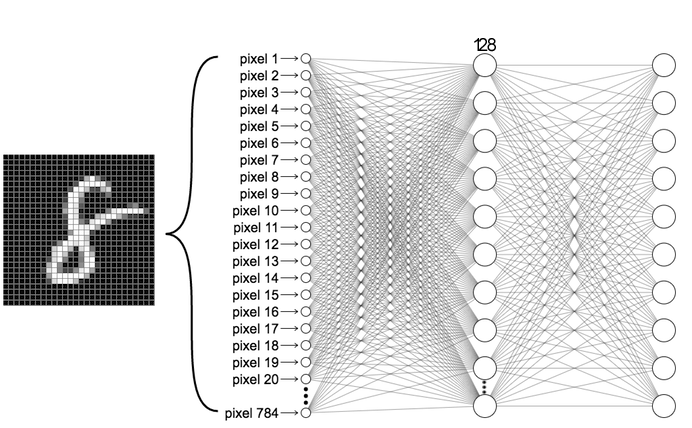

### Load tool modules

In [34]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


### Load CNN models

In [46]:
from keras.datasets import mnist


### Load the dataset

In [47]:
# Load the MNIST dataset and split it into training and testing sets
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()


### Show 10 input images

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


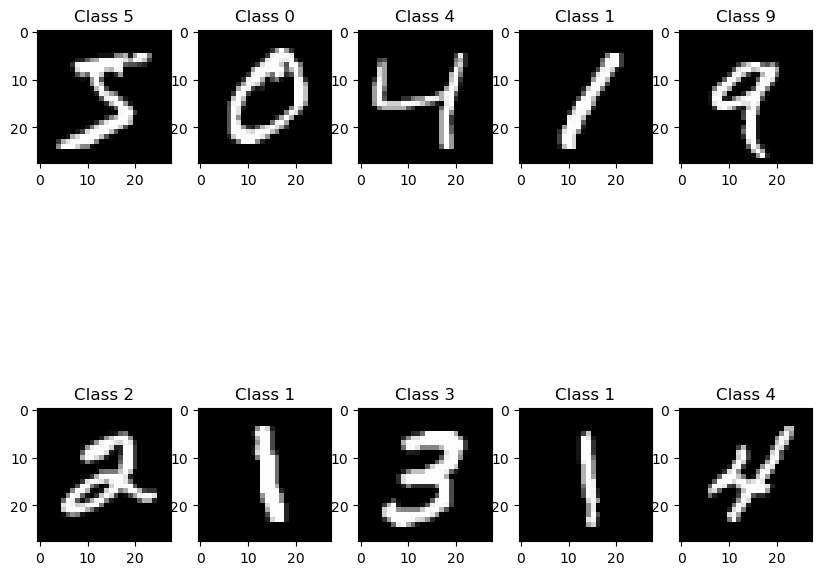

In [48]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

plt.figure(figsize=(10,9))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title(f"Class {y_train[i]}")

# <font color=blue> Build the CNN Model</font>

## <font color=green>Pre-process the data:</font>
__1. Reshape $X$ and $Y$ to $(m, 28, 28, 1)$, where $m=$ # of samples in the dataset__

__2. Normalize the pixels for each image.__  

__3. Convert the output labels (y_train and y_test) to categorical data.__

In [49]:
# Set the number of categories and define the shape of input images
num_categories = 10
input_shape = (28, 28, 1)


### Normalize the pixels

In [50]:
# Normalize the pixel values of the images to a range between 0 and 1
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

### Convert the output labels (y_train and y_test) to categorical data

In [51]:

train_labels = keras.utils.to_categorical(train_labels, num_categories)
test_labels = keras.utils.to_categorical(test_labels, num_categories)


print('Shape of Y_train =', Y_train.shape)
print('Shape of Y_test =', Y_test.shape)


Shape of Y_train = (60000, 10)
Shape of Y_test = (10000, 10)


## <font color=green>Define the CNN model</font> 

__Use CONV, POOL and FC layers to construct your CNN model. You will train and test the model after this step.__

In [52]:
# Define a modified convolutional neural network architecture
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(256, activation="relu"),
    layers.Dense(num_categories, activation="softmax")
])


### Print the model summary that shows the output shape and # of parameters for each layer.

In [53]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 flatten_4 (Flatten)         (None, 1152)             

## <font color=green>Train the CNN Model</font>

In [77]:
# Compile the model with specified optimizer and loss function
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Set the batch size and number of epochs for training
batch_size = 64
epochs = 25

# Train the model using the training data
model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs)


Epoch 1/25
938/938 [==============================] - 22s 23ms/step - loss: 0.0114 - accuracy: 0.9966
Epoch 2/25
938/938 [==============================] - 21s 22ms/step - loss: 0.0100 - accuracy: 0.9968
Epoch 3/25
938/938 [==============================] - 21s 22ms/step - loss: 0.0099 - accuracy: 0.9969
Epoch 4/25
938/938 [==============================] - 21s 22ms/step - loss: 0.0108 - accuracy: 0.9966
Epoch 5/25
938/938 [==============================] - 21s 22ms/step - loss: 0.0096 - accuracy: 0.9969
Epoch 6/25
938/938 [==============================] - 21s 22ms/step - loss: 0.0103 - accuracy: 0.9966
Epoch 7/25
938/938 [==============================] - 21s 23ms/step - loss: 0.0094 - accuracy: 0.9969
Epoch 8/25
938/938 [==============================] - 21s 22ms/step - loss: 0.0084 - accuracy: 0.9973
Epoch 9/25
938/938 [==============================] - 22s 24ms/step - loss: 0.0073 - accuracy: 0.9976
Epoch 10/25
938/938 [==============================] - 21s 22ms/step - loss: 0.006

In [78]:
history = model.fit(
    train_images, train_labels, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_data=(test_images, test_labels)
)


Epoch 1/25
938/938 [==============================] - 23s 24ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.0362 - val_accuracy: 0.9940
Epoch 2/25
938/938 [==============================] - 23s 24ms/step - loss: 0.0073 - accuracy: 0.9978 - val_loss: 0.0343 - val_accuracy: 0.9939
Epoch 3/25
938/938 [==============================] - 22s 23ms/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.0389 - val_accuracy: 0.9937
Epoch 4/25
938/938 [==============================] - 22s 23ms/step - loss: 0.0063 - accuracy: 0.9982 - val_loss: 0.0397 - val_accuracy: 0.9943
Epoch 5/25
938/938 [==============================] - 22s 23ms/step - loss: 0.0063 - accuracy: 0.9981 - val_loss: 0.0377 - val_accuracy: 0.9937
Epoch 6/25
938/938 [==============================] - 22s 23ms/step - loss: 0.0069 - accuracy: 0.9981 - val_loss: 0.0341 - val_accuracy: 0.9939
Epoch 7/25
938/938 [==============================] - 22s 23ms/step - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.0358 - val_accuracy:

In [79]:
# Evaluate the model performance on the test data
evaluation = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", evaluation[0])
print("Test accuracy:", evaluation[1])

Test loss: 0.05099273845553398
Test accuracy: 0.9932000041007996


### Compare Loss and Accuracy Performance for train and validation data

#### Plot the loss data, for both train and validation data

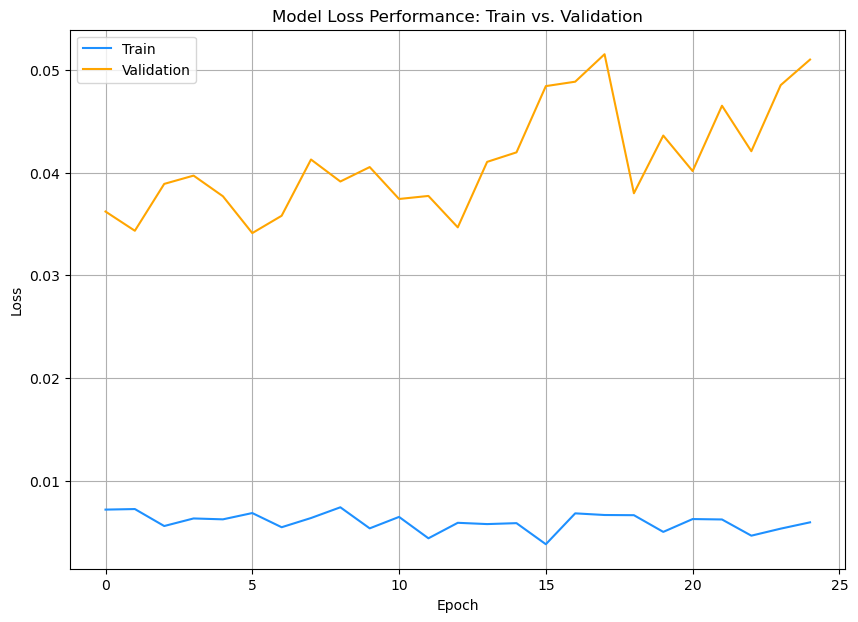

In [80]:
# Extract loss data
J = history.history['loss']  # Loss data for Training 
J_val = history.history['val_loss']  # Loss data for Validation

# Plotting
plt.figure(figsize=(10,7))
plt.title('Model Loss Performance: Train vs. Validation')
plt.plot(J, color='DodgerBlue', label='Train')
plt.plot(J_val, color='orange', label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()


#### Plot the accuracy data, for both train and validation data

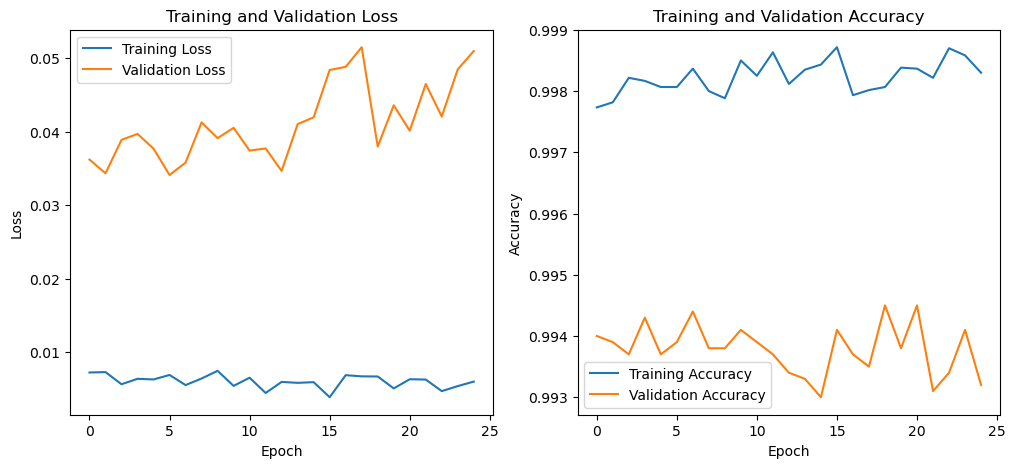

In [81]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


## <font color=green>Test the CNN Model</font>

In [85]:
# Evaluate the model performance on the test data
evaluation = model.evaluate(test_images, test_labels, verbose=0)



### Print the final loss and accuracy of the test data

In [86]:
print("Test loss:", evaluation[0])
print("Test accuracy:", evaluation[1])

Test loss: 0.05099273845553398
Test accuracy: 0.9932000041007996


### Save the CNN model parameters

In [87]:
model.save('MNIST_baseline_model.h5')




C:\Users\prabi\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [90]:
model.save('D:\Hand-digit/MNIST_baseline_model.h5')

In [91]:
model_path = 'D:\Hand-digit/MNIST_baseline_model.h5'  # Replace with your desired path

In [92]:
model.save(model_path)

In [93]:
from tensorflow.keras.models import load_model

model = load_model('D:Hand-digit/MNIST_baseline_model.h5')  # Replace with your model file


In [95]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

img = load_img('C:/Users/prabi/Downloads/sample_digit_7.png', color_mode='grayscale', target_size=(28, 28))


# Convert the image to an array and normalize
img_array = img_to_array(img) / 255.0

# Reshape the array for the model
img_array = img_array.reshape((1, 28, 28, 1))  # The first 1 is for the batch size


In [96]:
prediction = model.predict(img_array)


1/1 [==============================] - 0s 60ms/step


In [97]:
predicted_class = np.argmax(prediction, axis=1)


In [98]:
print(f"The model predicts: {predicted_class[0]}")


The model predicts: 7


## <center><font color=maroon>Remember to turn in both the notebook and the pdf version.</font></center>